In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import scrublet 
from matplotlib.pyplot import rc_context
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=50, dpi_save=300, figsize=(5, 5),color_map='Reds')

In [31]:
os.chdir('/disk212/yupf/database/scRNA-seq/NewAtlas') #修改路径
concat_file='./atlas_concat.h5ad'
QC_file='./atlas_qc.h5ad'
reduction_file = './atlas_rd.h5ad'
harmony_file='./atlas_harm.h5ad'
scVI_file='./atlas_scvi.h5ad'
level1_annotation_file ='./atlas_level1.h5ad'

In [3]:
adata=sc.read_h5ad(scVI_file)

In [4]:
adata

AnnData object with n_obs × n_vars = 589101 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'neighbors', 'project_colors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [19]:
sc.tl.leiden(adata,resolution = 0.5)

### Lineage

Epithelial lineage

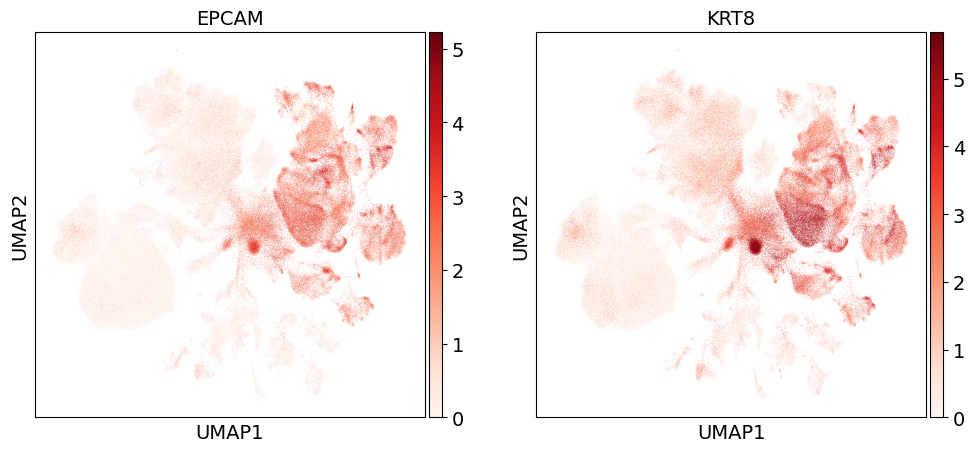

In [5]:
sc.pl.umap(adata,color=['EPCAM', 'KRT8'])

T/ILC lineage

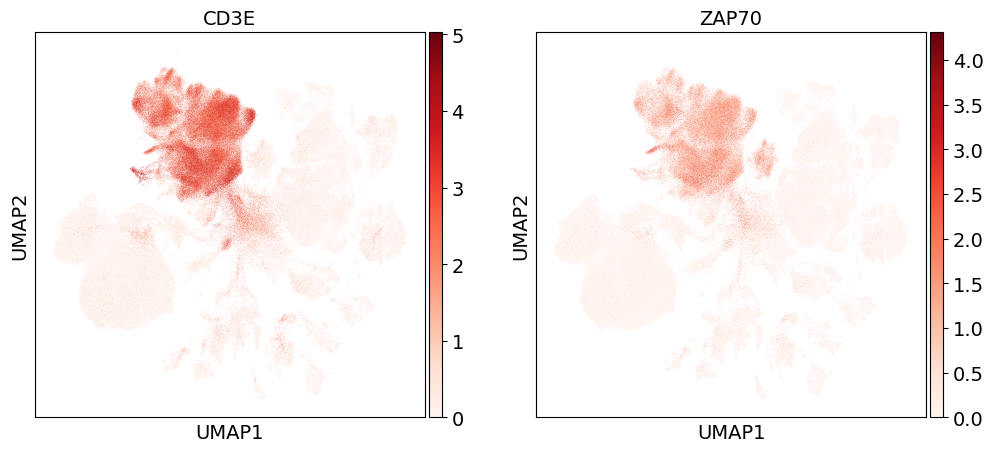

In [6]:
sc.pl.umap(adata,color=['CD3E', 'ZAP70'])

Myeloid lineage

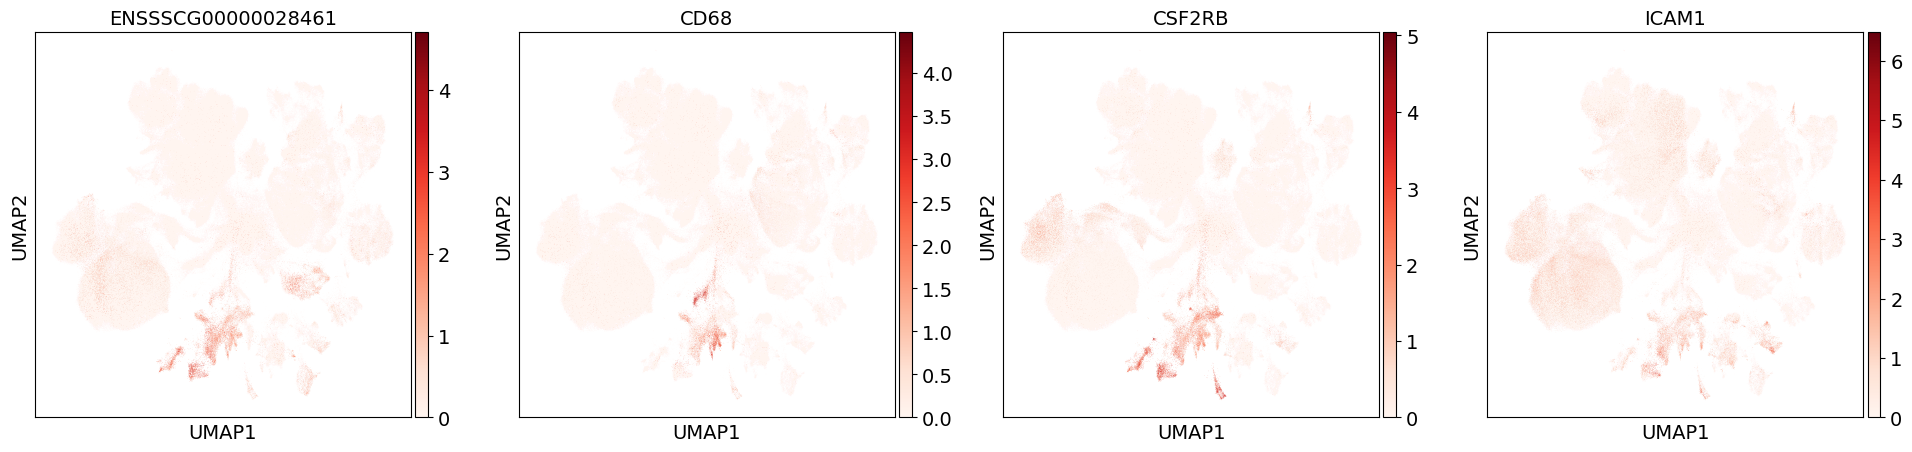

In [7]:
sc.pl.umap(adata,color=['ENSSSCG00000028461', 'CD68', 'CSF2RB', 'ICAM1'])

B lineage

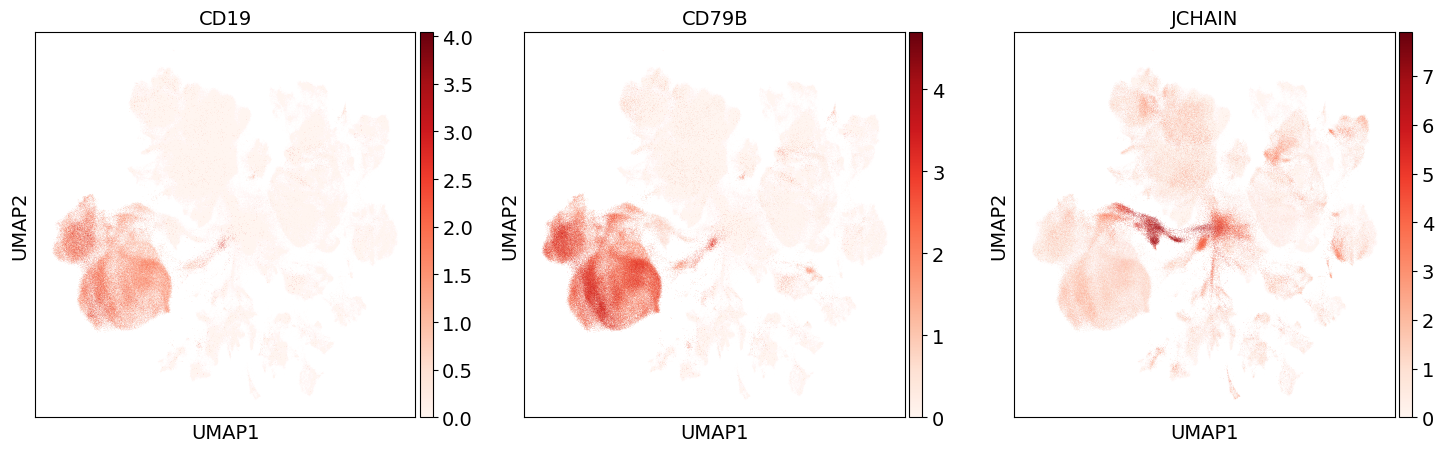

In [8]:
sc.pl.umap(adata,color=['CD19', 'CD79B', 'JCHAIN'])

Endothelial lineage

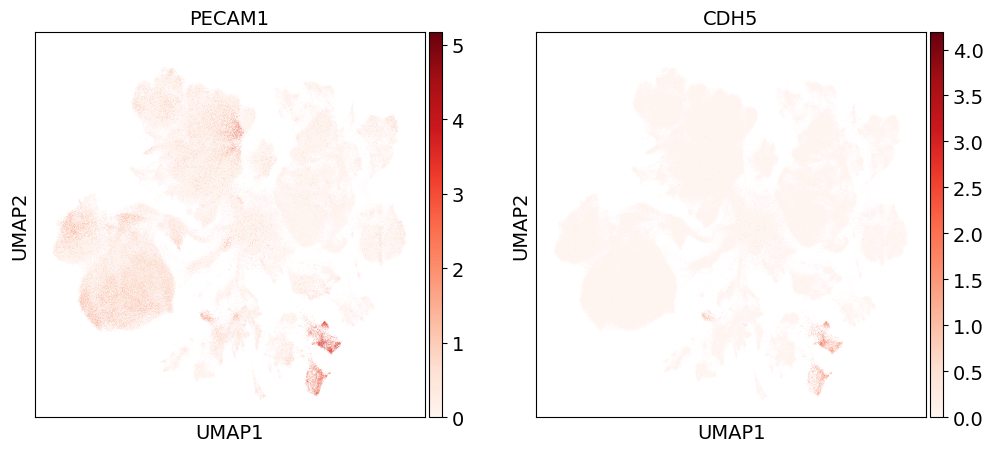

In [9]:
sc.pl.umap(adata,color=['PECAM1','CDH5'])

Mesenchymal lineage

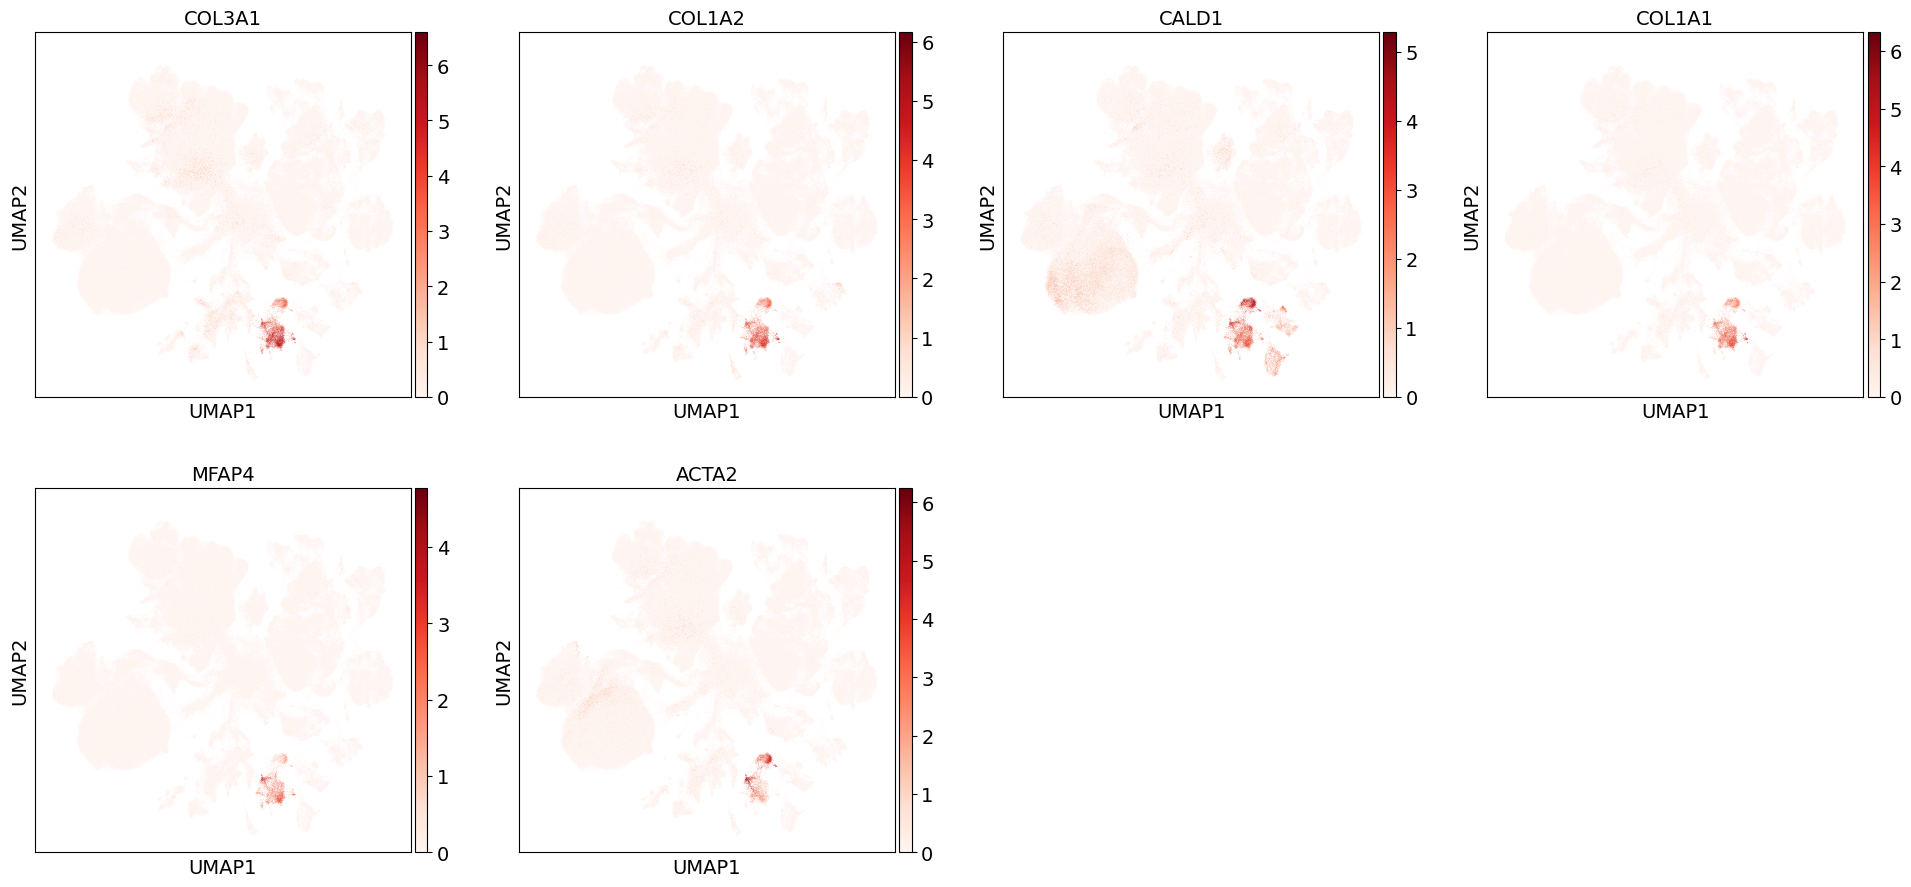

In [10]:
sc.pl.umap(adata,color=['COL3A1','COL1A2','CALD1','COL1A1', 'MFAP4','ACTA2'])

Neuron lineage

#human
SOX10,RET,FOXD3
#pig 
GAP43#神经元
CLDN11#神经胶质细胞

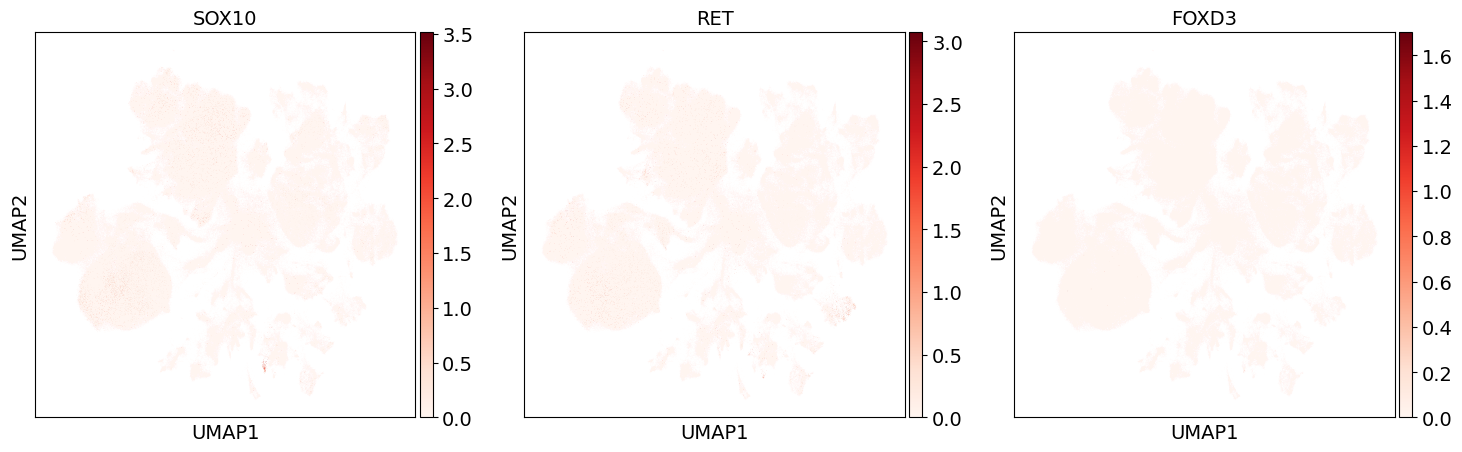

In [12]:
sc.pl.umap(adata,color=['SOX10','RET','FOXD3'])

### celltypist

In [13]:
import celltypist
import time

In [20]:
predictions = celltypist.annotate(adata, model = '/disk212/yupf/database/scRNA-seq/auto_anno/model/Lineage.pkl', majority_voting = True,over_clustering='leiden')
adata = predictions.to_adata()

🔬 Input data has 589101 cells and 19346 genes
🔗 Matching reference genes in the model
🧬 2242 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


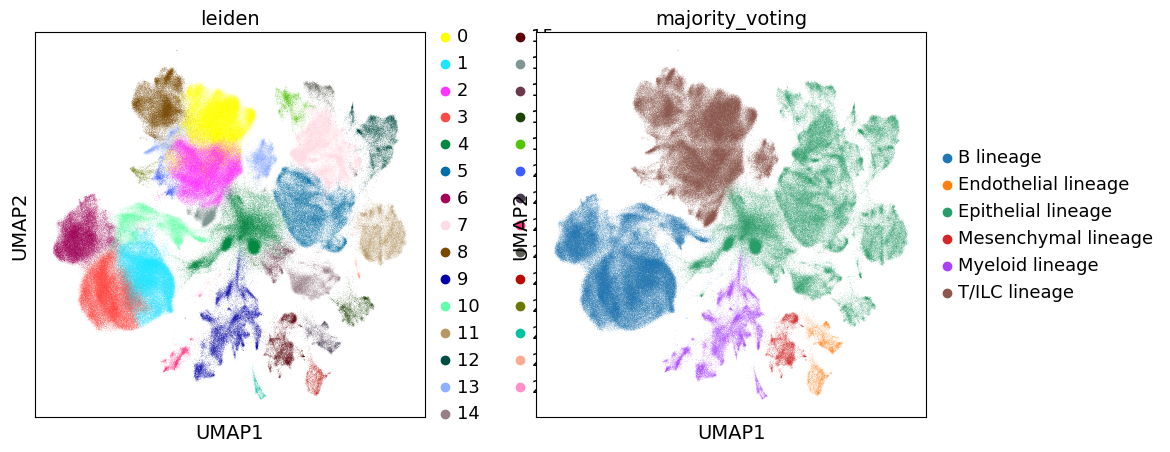

In [21]:
sc.pl.umap(adata,color=['leiden','majority_voting'])

In [26]:
adata.obs['Lineage']=adata.obs['majority_voting']

In [22]:
import anndata

# 获取指定基因在 .var 中的索引
gene_index = adata.var_names.get_loc('SOX10')
# gene_index = adata.var_names.get_loc('CLDN11')

# 设置筛选条件，例如表达水平大于阈值
expression_threshold = 1.0

# 使用布尔索引获取满足条件的细胞
selected_cells = adata[adata.X[:, gene_index] > expression_threshold]
selected_cells

View of AnnData object with n_obs × n_vars = 2259 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'neighbors', 'project_colors', 'umap', 'leiden', 'leiden_colors', 'majority_voting_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [28]:
adata.obs['Lineage'] = adata.obs['Lineage'].cat.add_categories("Neuron Lineage")

In [29]:
cells_to_find = selected_cells.obs_names
# 将匹配到的细胞的 celltype 设置为 "neuron"
adata.obs.loc[cells_to_find, 'Lineage'] = "Neuron Lineage"

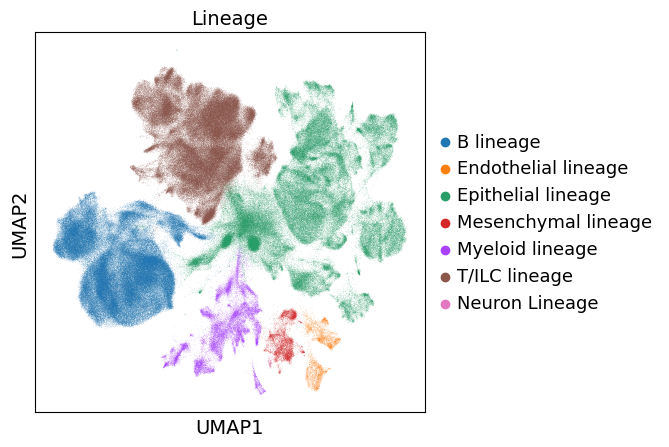

In [30]:
sc.pl.umap(adata,color=['Lineage'])

In [32]:
adata.write(level1_annotation_file)